In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit
import seaborn as sns

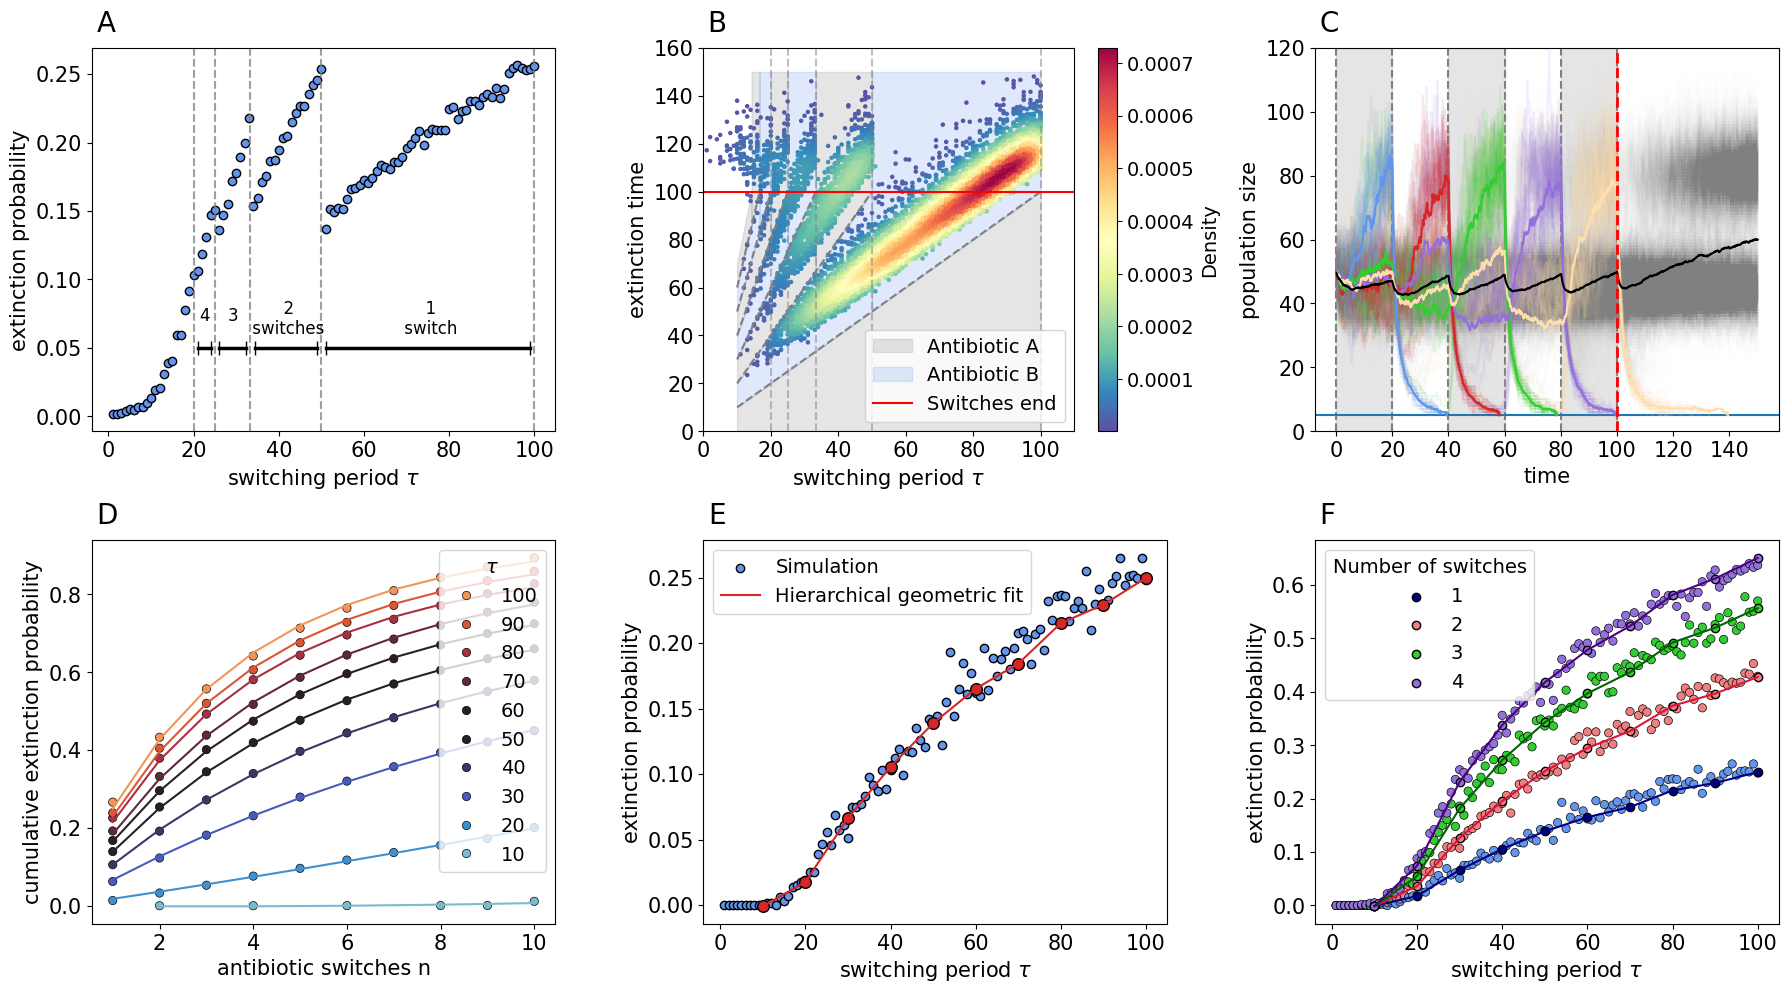

In [3]:
#plt.figure(figsize=(18,10))
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# CURVA DE EXTINCION
plt.subplot(2,3,1)
df = pd.read_csv('Extinction curve/ext_rate_n10000.csv')
df['Dead'] = df['FinalTime'] < 150

dfext = df.groupby(['Dead', 'SeasonLength','Trajectory']).count().reset_index()
dfext = dfext.groupby(['Dead', 'SeasonLength']).count().reset_index()
dfext['ExtRate'] = 1 - dfext['Trajectory']/10000
dfext = dfext[dfext['Dead']==False]

plt.scatter(dfext['SeasonLength'], dfext['ExtRate'], ec='black',color='cornflowerblue')

for i in range(1,6):
    plt.axvline(x=100/i,linestyle='--',color='gray',alpha=0.5)

for i in range(1,6):
    plt.axvline(x=100/i,linestyle='--',color='gray',alpha=0.5)
    if i == 3 or i==4:
        #plt.text(100/i - 5,0.0,str(i)+' switches',rotation='vertical',fontsize=15)
        pass
        
plt.text(75,0.06,'  1 \n switch',fontsize=12,ha='center')
plt.plot([51,99],[0.05,0.05],marker='|',color='black',linewidth=2.5,ms=10)

plt.text(83.3/2,0.06,'  2 \n switches',fontsize=12,ha='center')#,bbox=dict(facecolor='white', edgecolor='black'))
plt.plot([34.3,49],[0.05,0.05],marker='|',color='black',linewidth=2.5,ms=10)

plt.text((100/4 + 100/3)/2,0.07,'3',fontsize=12,ha='center')
plt.plot([100/4+1,100/3-1],[0.05,0.05],marker='|',color='black',linewidth=2.5,ms=10)
plt.text((100/4 + 100/5)/2,0.07,'4',fontsize=12,ha='center')
plt.plot([100/5+1,100/4-1],[0.05,0.05],marker='|',color='black',linewidth=2.5,ms=10)

plt.xlabel('switching period '+r'$\tau$',fontsize=15)
plt.ylabel('extinction probability',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#TIEMPOS
plt.subplot(2,3,2)

df = pd.read_csv('Extinction curve/ext_rate_n10000.csv')
df['Dead'] = df['FinalTime'] < 150
df = df[df['Dead'] == True]
df = df.sample(n=10000, random_state=42)

plt.fill_between([10,100],[10*0,100*0],[10*(0+1),100*(0+1)],alpha=0.2,color='gray', label='Antibiotic A')

for region in range(1,7,1):
    if region%2 == 0:
        x = np.linspace(10,100/(region+1),10)
        plt.fill_between(x,x*region, x*(region+1), alpha=0.2,color='gray', label='Antibiotic A')

        x = np.linspace(100/(region+1),100/region,10)
        plt.fill_between(x,x*(region),[150]*len(x),alpha=0.2,color='gray')
    else:
        x = np.linspace(10,100/(region+1),10)
        plt.fill_between(x,x*region, x*(region+1), alpha=0.2,color='cornflowerblue', label='Antibiotic B')

        x = np.linspace(100/(region+1),100/region,10)
        plt.fill_between(x,x*(region),[150]*len(x),alpha=0.2,color='cornflowerblue')

xy = np.vstack([df['SeasonLength'], df['FinalTime']])  # Apilar las coordenadas
z = gaussian_kde(xy)(xy)

plt.scatter(df['SeasonLength'], df['FinalTime'], c=z, s=5, rasterized=True, cmap='Spectral_r')
cbar = plt.colorbar()
cbar.set_label('Density',fontsize=14)
cbar.ax.tick_params(labelsize=14)

#sns.histplot(data=df, x='SeasonLength', y='FinalTime',cbar=True,cmap='Spectral_r',pthresh=0.01, pmax=0.9)

for slope in range(1,7):
    plt.plot([10,100/slope],[10*slope,100],linestyle='--',color='gray')
    

for i in range(1,6):
    plt.axvline(x=100/i,linestyle='--',color='gray',alpha=0.5)

plt.axhline(y=100, color='red', label='Switches end')
#plt.axis('equal')
plt.xlim(0,110)
plt.ylim(0,160)

plt.xlabel('switching period '+r'$\tau$',fontsize=15)
plt.ylabel('extinction time',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Crea un diccionario para eliminar duplicados
plt.legend(unique_labels.values(), unique_labels.keys(),fontsize=14,title_fontsize=14)


#TRAYECTORIAS
plt.subplot(2,3,3)

df = pd.read_csv('Extinction curve/trajectories_plot.csv')
dfext = df.groupby(['SeasonLength','Trajectory']).max().reset_index()
dfext = dfext.drop(columns=['x0','x1','x2','x3'])
df = pd.merge(df, dfext, on=['SeasonLength','Trajectory'],suffixes=('','_final'))

df['Dead'] = df['Time_final'] < 150
df['Round'] = df['Time_final'] // 20 
df['Round'] = df['Round'].replace({6:5})
df['N'] = df['x0']+df['x1']+df['x2']+df['x3']

colorsbackground = {3:'limegreen',2:'tab:red',1:'cornflowerblue',4:'mediumpurple',5:'navajowhite',7:'gray'}
colorsmean       = {3:'limegreen',2:'tab:red',1:'cornflowerblue',4:'mediumpurple',5:'navajowhite',7:'black'}

for traj in df.groupby(['Round','Trajectory']):
    alpha = 0.002 if traj[0][0] == 7 else 0.1
    zorder = 8 - traj[0][0]
    plt.plot(traj[1]['Time'],traj[1]['N'],alpha=alpha,color=colorsbackground[traj[0][0]],zorder=zorder)

dfmean = df.groupby(['SeasonLength','Round','Time']).mean(numeric_only=True).reset_index()

for traj in dfmean.groupby(['Round','Trajectory']):
    plt.plot(traj[1]['Time'],traj[1]['N'],color=colorsmean[traj[0][0]],zorder=8)

for i in range(6):
    plt.axvline(x=20*i,color='gray',linestyle='--')
    
for i in range(0,5,2):
    plt.fill_betweenx([0,140],20*i,20*(i+1),color='gray',alpha=0.2)

plt.axhline(y=5,label='Extinction threshold')
plt.axvline(x=100, color='red', linestyle='--', linewidth=2,zorder=23)

plt.ylim(0,120)
plt.xlabel('time',fontsize=15)
plt.ylabel('population size',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#GEOMETRICA
plt.subplot(2,3,4)


df = pd.read_csv('Geometric fit/geom_ext_rate.csv')
df['MaxTime'] = df['SeasonLength']*10 + 50
df['Dead'] = df['FinalTime'] < df['MaxTime']
df['Rounds'] = np.minimum(df['FinalTime'] // df['SeasonLength'] , 10)

dfext = df.sort_values(['SeasonLength', 'Rounds']).reset_index(drop=True)
dfext = dfext.groupby(['Dead', 'SeasonLength', 'Rounds']).count().reset_index()

dfext['cum'] = dfext.groupby(['Dead', 'SeasonLength'])['Trajectory'].cumsum()
dfext = dfext[dfext['Dead']==True]

dfext['N_obs'] = 10000 - (dfext['cum'] - dfext['Trajectory'])
dfext['p_ind'] = dfext['Trajectory']/dfext['N_obs']
dfext['p_cum'] = dfext.groupby(['Dead', 'SeasonLength'])['p_ind'].cumsum()

dfext['ExtRate'] = dfext['cum'] / 10000

#colors = plt.cm.Set2.colors

handles = []
labels = []



def geom_model_jerarquico(X, alpha, beta):
    N, tau = X
    p = alpha * tau + beta * N
    return 1 - (1 - p) ** N

resultados = []

# Asegúrate de que el nombre de la columna esté bien escrito
dfext['SeasonLength'] = dfext['SeasonLength']  # Corrige si antes era 'SeasonLenght'

for season, grupo in dfext.groupby('SeasonLength'):
    N_vals = grupo['Rounds'].values
    P_vals = grupo['ExtRate'].values
    tau_vals = grupo['SeasonLength'].values  # constante para el grupo

    try:
        # Ajustamos usando como input una tupla (N, tau)
        popt, _ = curve_fit(
            geom_model_jerarquico,
            (N_vals, tau_vals),
            P_vals,
            bounds=(-10, 10)
        )
        alpha_estimado, beta_estimado = popt
    except RuntimeError:
        alpha_estimado = np.nan
        beta_estimado = np.nan

    resultados.append({
        'SeasonLength': season,
        'alpha_estimado': alpha_estimado,
        'beta_estimado': beta_estimado
    })

# Convertimos resultados en DataFrame
df_geom = pd.DataFrame(resultados)
dfext = pd.merge(dfext, df_geom, on='SeasonLength')
# Calculamos p_estimado y P ajustado
dfext['p_estimado'] = dfext['SeasonLength'] * dfext['alpha_estimado'] + dfext['Rounds'] * dfext['beta_estimado']
dfext['P'] = 1 - (1 - dfext['p_estimado']) ** dfext['Rounds']

orden = sorted(dfext['SeasonLength'].unique(), reverse=True)

colors = sns.color_palette('icefire_r',len(orden))
special_palette=dict(zip(orden,colors))

sns.scatterplot(data=dfext, x='Rounds', y='ExtRate', hue='SeasonLength',palette=special_palette,ec='black',hue_order=orden)
sns.lineplot(data=dfext, x='Rounds', y='P', hue='SeasonLength',palette=special_palette,legend=False,hue_order=orden)

plt.legend(fontsize=14,title=r'$\tau$',title_fontsize=14,loc='upper right')
plt.xlabel('antibiotic switches n',fontsize=15)
plt.ylabel('cumulative extinction probability',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title(r'$1 - (1 - (\alpha \tau + \beta n))^n$', fontsize=20)

#AJUSTAR p
plt.subplot(2,3,5)

df = pd.read_csv('Extinction curve/ext_rate_oneS.csv')
df['Dead'] = df['FinalTime'] < df['SeasonLength'] + 50

dfext = df.groupby(['SeasonLength','Dead']).count().reset_index()

dfext = dfext[dfext['Dead']==False]
dfext['ExtRate'] = 1 - dfext['Trajectory'] / 1000


plt.scatter(dfext['SeasonLength'], dfext['ExtRate'], color='cornflowerblue', ec='black', label='Simulation')
df_geom['p_estimado'] = df_geom['alpha_estimado']*df_geom['SeasonLength'] + df_geom['beta_estimado']
plt.plot(df_geom['SeasonLength'], df_geom['p_estimado'], color='tab:red',label='Hierarchical geometric fit')
plt.scatter(df_geom['SeasonLength'], df_geom['p_estimado'], color='tab:red', ec='black', s=70)
plt.xlabel('switching period '+r'$\tau$',fontsize=15)
plt.ylabel('extinction probability',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=14,title_fontsize=14)


#AJUSTAR geomtrica a la extinction curve
plt.subplot(2,3,6)

df_geom['n2'] = 1 - (1-(df_geom['alpha_estimado']*df_geom['SeasonLength'] + df_geom['beta_estimado']*2))**2
df_geom['n3'] = 1 - (1-(df_geom['alpha_estimado']*df_geom['SeasonLength'] + df_geom['beta_estimado']*3))**3
df_geom['n4'] = 1 - (1-(df_geom['alpha_estimado']*df_geom['SeasonLength'] + df_geom['beta_estimado']*4))**4

df1 = pd.read_csv('Extinction curve/ext_rate_oneS.csv')
df1['Switch'] = [1]*df1.shape[0]
df2 = pd.read_csv('Extinction curve/ext_rate_twoS.csv')
df2['Switch'] = [2]*df2.shape[0]
df3 = pd.read_csv('Extinction curve/ext_rate_threeS.csv')
df3['Switch'] = [3]*df3.shape[0]
df4 = pd.read_csv('Extinction curve/ext_rate_fourS.csv')
df4['Switch'] = [4]*df4.shape[0]

df = pd.concat([df1, df2, df3, df4])

df['Dead'] = df['FinalTime'] < df['Switch']*df['SeasonLength'] + 50

dfext = df.groupby(['SeasonLength','Dead','Switch']).count().reset_index()

dfext = dfext[dfext['Dead']==False]
dfext['ExtRate'] = 1 - dfext['Trajectory'] / 1000



colordict = {
    1:'cornflowerblue',
    2:'lightcoral',
    3:'limegreen',
    4:'mediumpurple'
}

colordictfit = {
    1:'darkblue',
    2:'crimson',
    3:'darkgreen',
    4:'indigo',
}

sns.scatterplot(data=dfext, x='SeasonLength', y='ExtRate', hue='Switch', ec='black', palette=colordict, legend=False,)

plt.scatter(df_geom['SeasonLength'], df_geom['p_estimado'], color='darkblue', ec='black',label='1')
plt.plot(df_geom['SeasonLength'], df_geom['p_estimado'], color='darkblue')


for n in range(2,5):
    plt.scatter(df_geom['SeasonLength'], df_geom['n'+str(n)], ec='black', label=str(n), color=colordict[n])
    plt.plot(df_geom['SeasonLength'], df_geom['n'+str(n)], color=colordictfit[n])

plt.legend(title='Number of switches',fontsize=14,title_fontsize=14)
plt.xlabel('switching period '+r'$\tau$',fontsize=15)
plt.ylabel('extinction probability',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Aplanar el array de ejes si es 2D
axes = axes.flatten()
# Letras A, B, C, ...
letters = ['A','B','C','D','E','F']

for i, ax in enumerate(axes):
    # Agrega la letra en la esquina superior izquierda de cada subplot
    ax.text(
        0.01, 1.1, letters[i],                # posición relativa en el eje (0,0 es abajo izquierda)
        transform=ax.transAxes,                # usa coordenadas relativas al eje
        fontsize=20, va='top'
    )

plt.tight_layout()
plt.savefig('Fig2.png',dpi=300)
plt.show()

<b>Sequential therapies with subinhibitory antibiotic concentrations cause extinction for a wide range of switching periods.</b>
(*A*) Probability of extinction at the end of the treatment as switching periods vary. The intervals between two vertical lines share the same number of treatment cycles. $10,000$ trajectories were used to estimate the probability as a function of $\tau$.
(*B*) Distribution of extinction times as a function of switching periods. Each point corresponds to the time a simulation went extinct. The colours represent the density of these events. The same background colour represents the same antibiotic used. The red line represents the end of the time we allow for switching antibiotics.
(*C*) One thousand individual trajectories switching treatment every 20 time units. Blue, red, green, purple and orange represent the mean of trajectories that go extinct upon switching antibiotics at different swicthing events. Black represents the mean of those trajectories that do not go extinct. Dashed lines indicate the antibiotic switch. 
(*D*) Cumulative extinction probability over 10 treatment switches with different switching periods $\tau$. Points represent extinction probabilities estimated through simulation, while the solid line reflects a fit to a hierarchical geometric distribution.
(*E*) Extiction probability for populations undergoing one antibiotic switch, blue points represent the simulation and the red points are the fitted extinction probabilities for the corresponding $\tau$ using the hierarchical geometric model (the red line is a guide to the eye).
(*F*) Predicted extinction probabilities for populations undergoing one to four antibiotic switches using the hierarchical geometric model. Simulations were performed with final times $\tau \cdot $(numer of switches)$+ 50$. Parameter values are shown in *SI Appendix*.